In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#improve resolution
%config InlineBackend.figure_format ='retina'

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 16})

In [26]:
carData = pd.read_csv('cars_history.csv').iloc[:, 1:]
carData.shape

(682, 5)

In [27]:
carData.head(3)

,title,mileage,price,distance,date_accessed
0,2015 Honda Civic EX,108597.0,13680.0,75.0,2022-09-19 16 hrs
1,2015 Honda Civic LX,111341.0,12450.0,NaN,2022-09-19 16 hrs
2,2014 Honda Civic LX,93949.0,12999.0,76.0,2022-09-19 16 hrs


In [28]:
carHistory = carData.groupby(['title', 'mileage', 'distance'])[
    ['date_accessed', 'price']].agg(lambda x: list(x)).reset_index()
carHistory.head(3)

,title,mileage,distance,date_accessed,price
0,2012 Honda Civic EX,118268.0,11.0,[2022-09-27 23 hrs],[11950.0]
1,2012 Honda Civic EX,119807.0,96.0,"[2022-09-19 16 hrs, 2022-09-19 17 hrs, 2022-09...","[12995.0, 12995.0, 12995.0, 12995.0, 12995.0, ..."
2,2012 Honda Civic LX,34798.0,19.0,"[2022-09-19 16 hrs, 2022-09-19 17 hrs, 2022-09...","[8950.0, 8950.0, 9950.0]"


In [29]:
# Adding columns to carHistory

carHistory['priceChange'] = carHistory['price'].apply(lambda x: x[-1] - x[0])
carHistory['mostRecentPrice'] = carHistory['price'].apply(lambda x: x[-1])

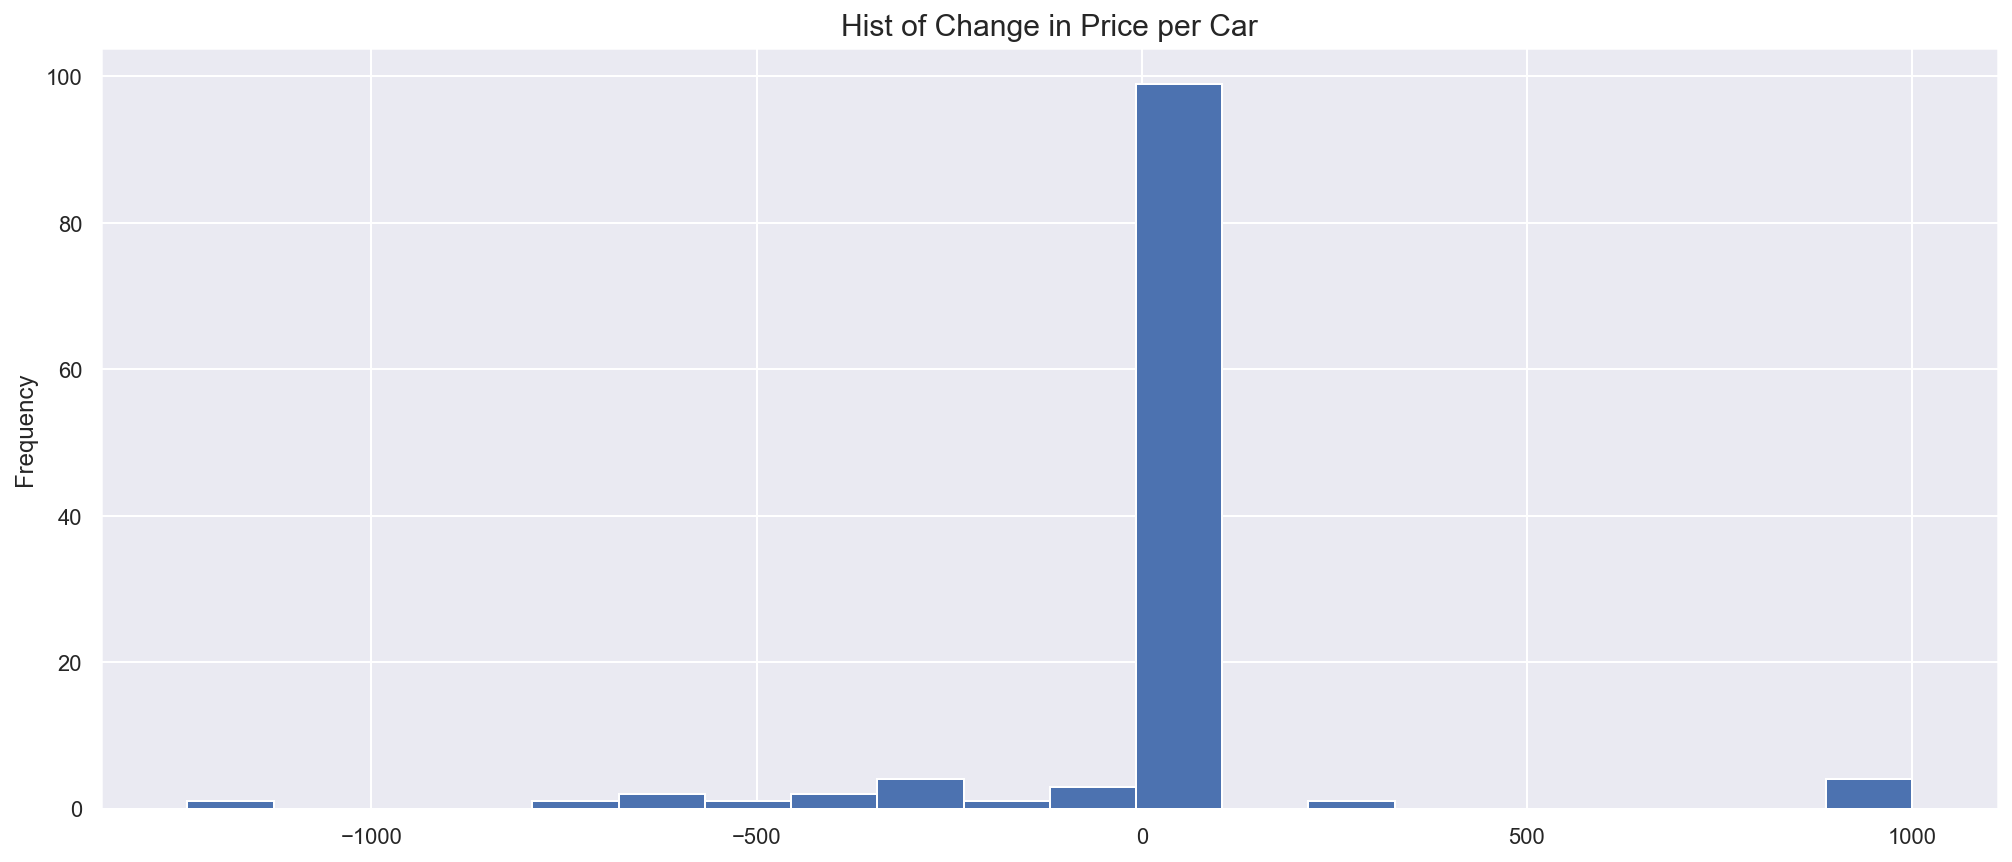

In [30]:
carHistory['priceChange'].plot(kind = 'hist', bins = 20)
plt.title('Hist of Change in Price per Car', size = 15)
plt.show()

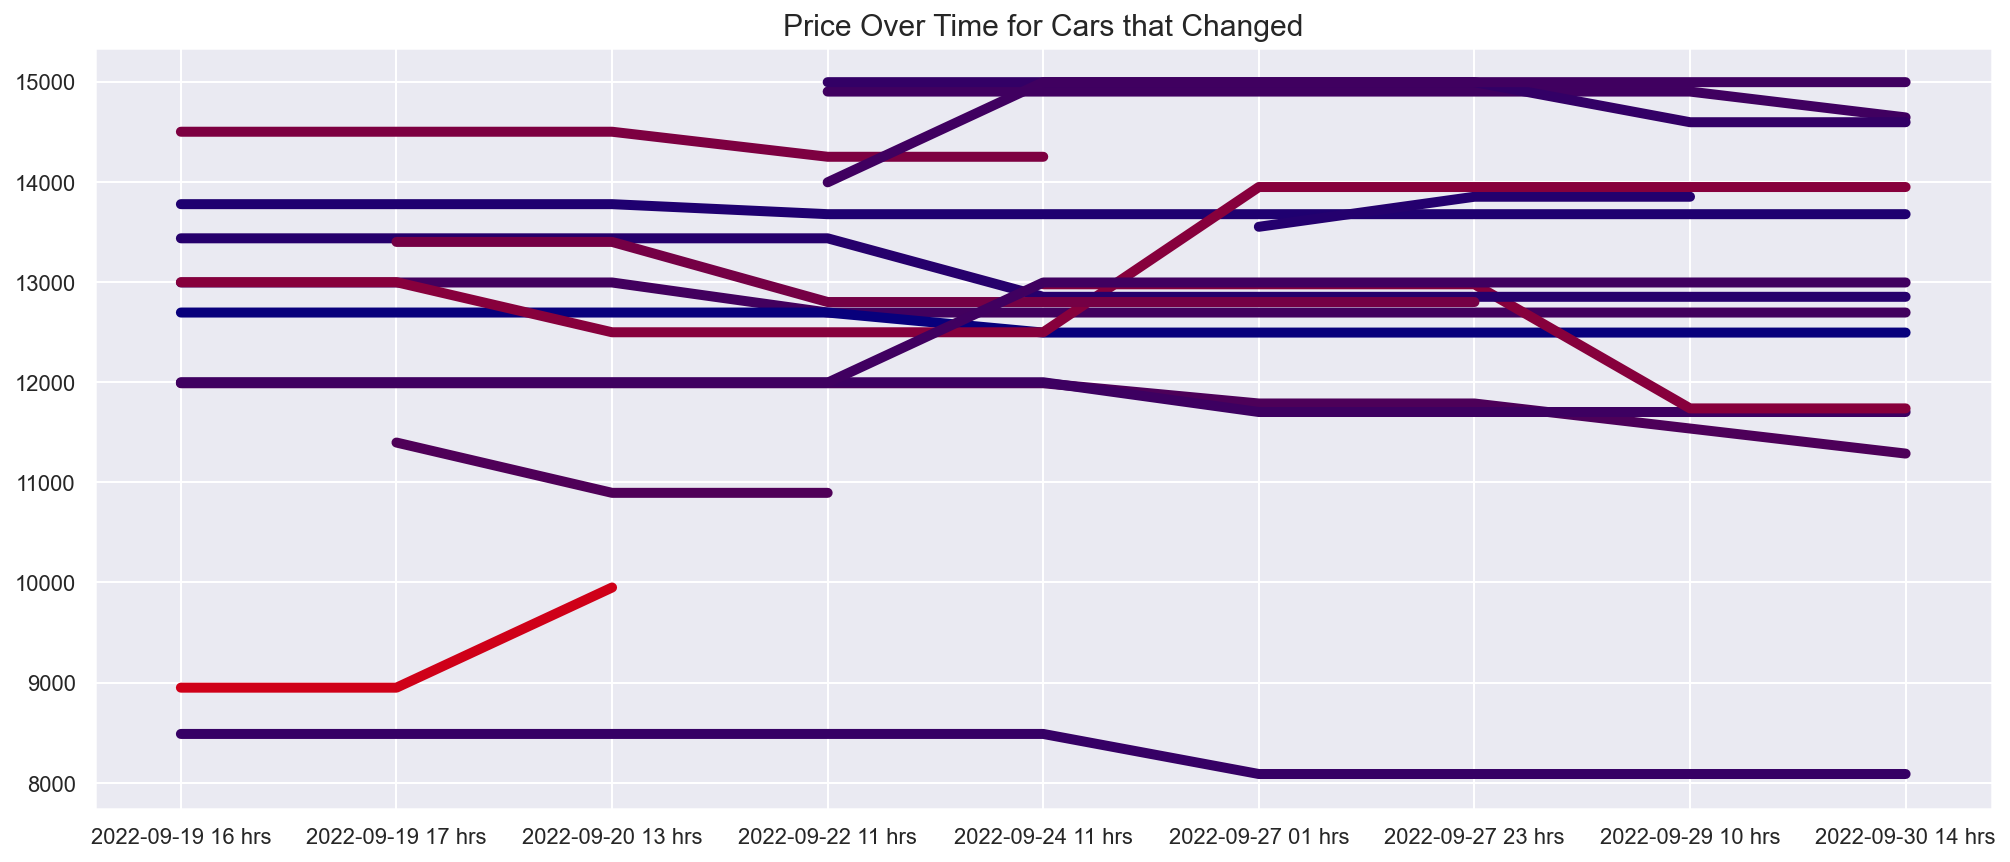

In [31]:
filtered = carHistory[carHistory['price'].apply(lambda x: np.ptp(x) > 50)]

fig, ax = plt.subplots()
for date, price, distance in filtered[['date_accessed', 'price', 'distance']].to_numpy():
    
    if pd.isnull(distance):
        col = 'gray'
    else:
        col = (1 - (distance/100), 0, (distance/200))
    ax.plot(date, price, alpha = 1, linewidth = 5, color = col)
plt.title('Price Over Time for Cars that Changed', size = 15)
plt.show()

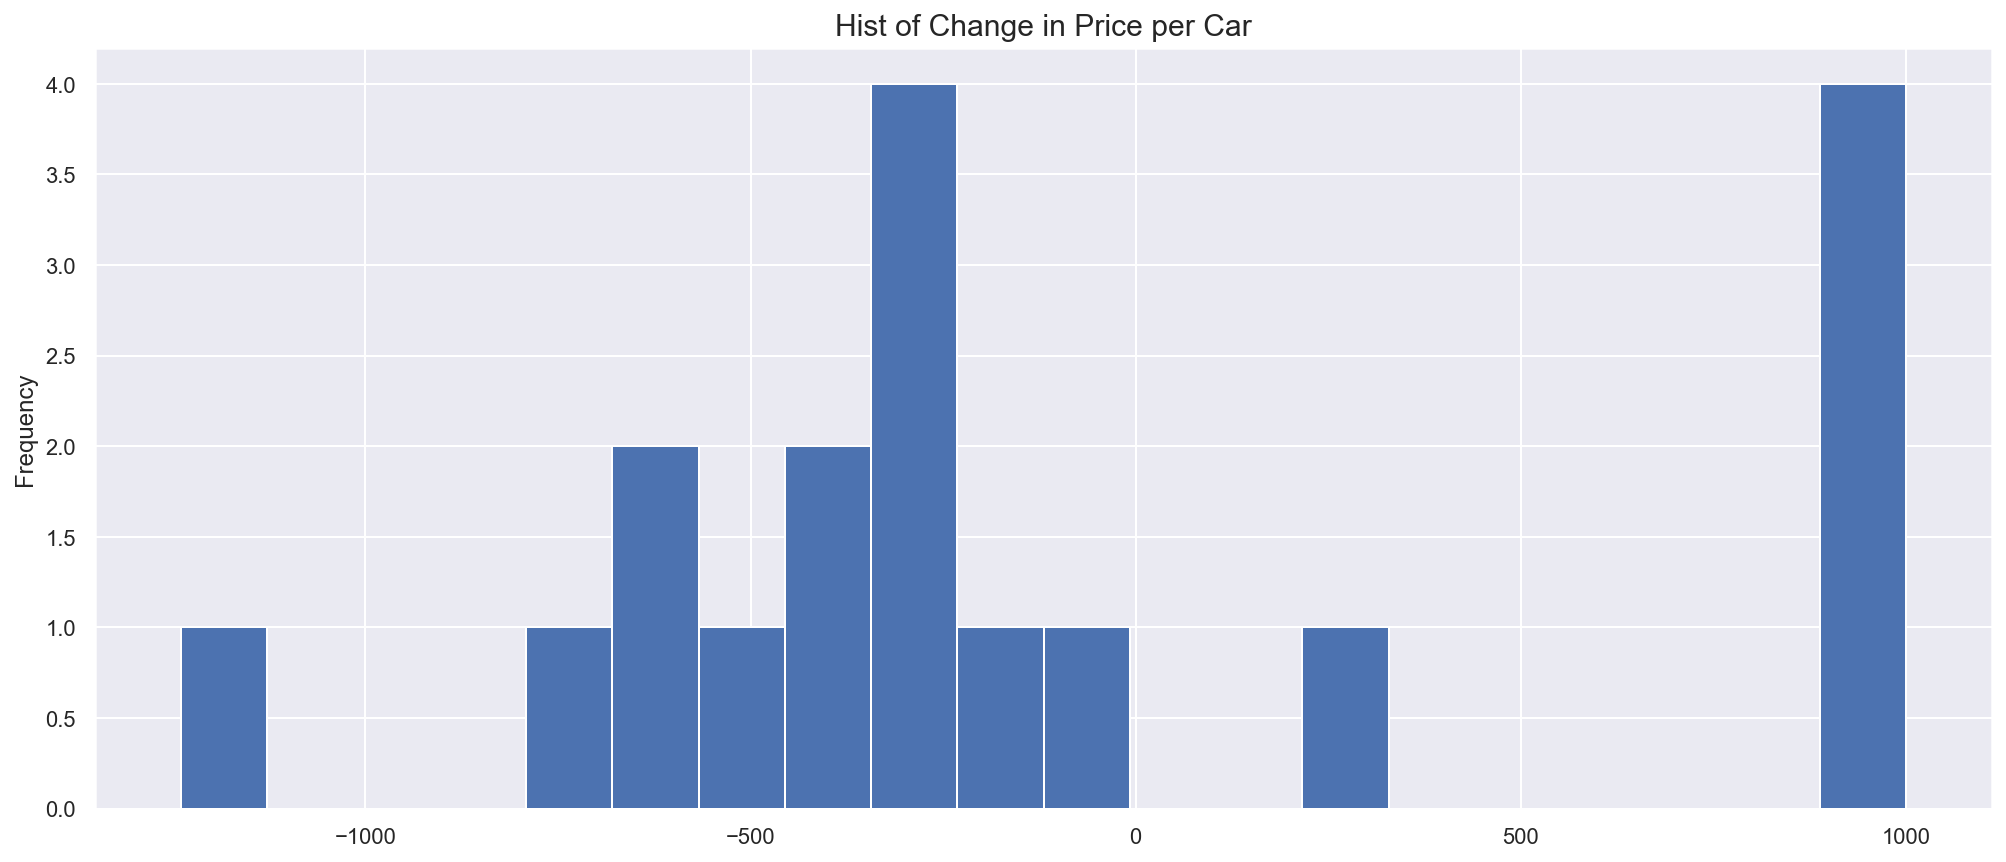

In [32]:
filtered['priceChange'].plot(kind = 'hist', bins = 20)
plt.title('Hist of Change in Price per Car', size = 15)
plt.show()

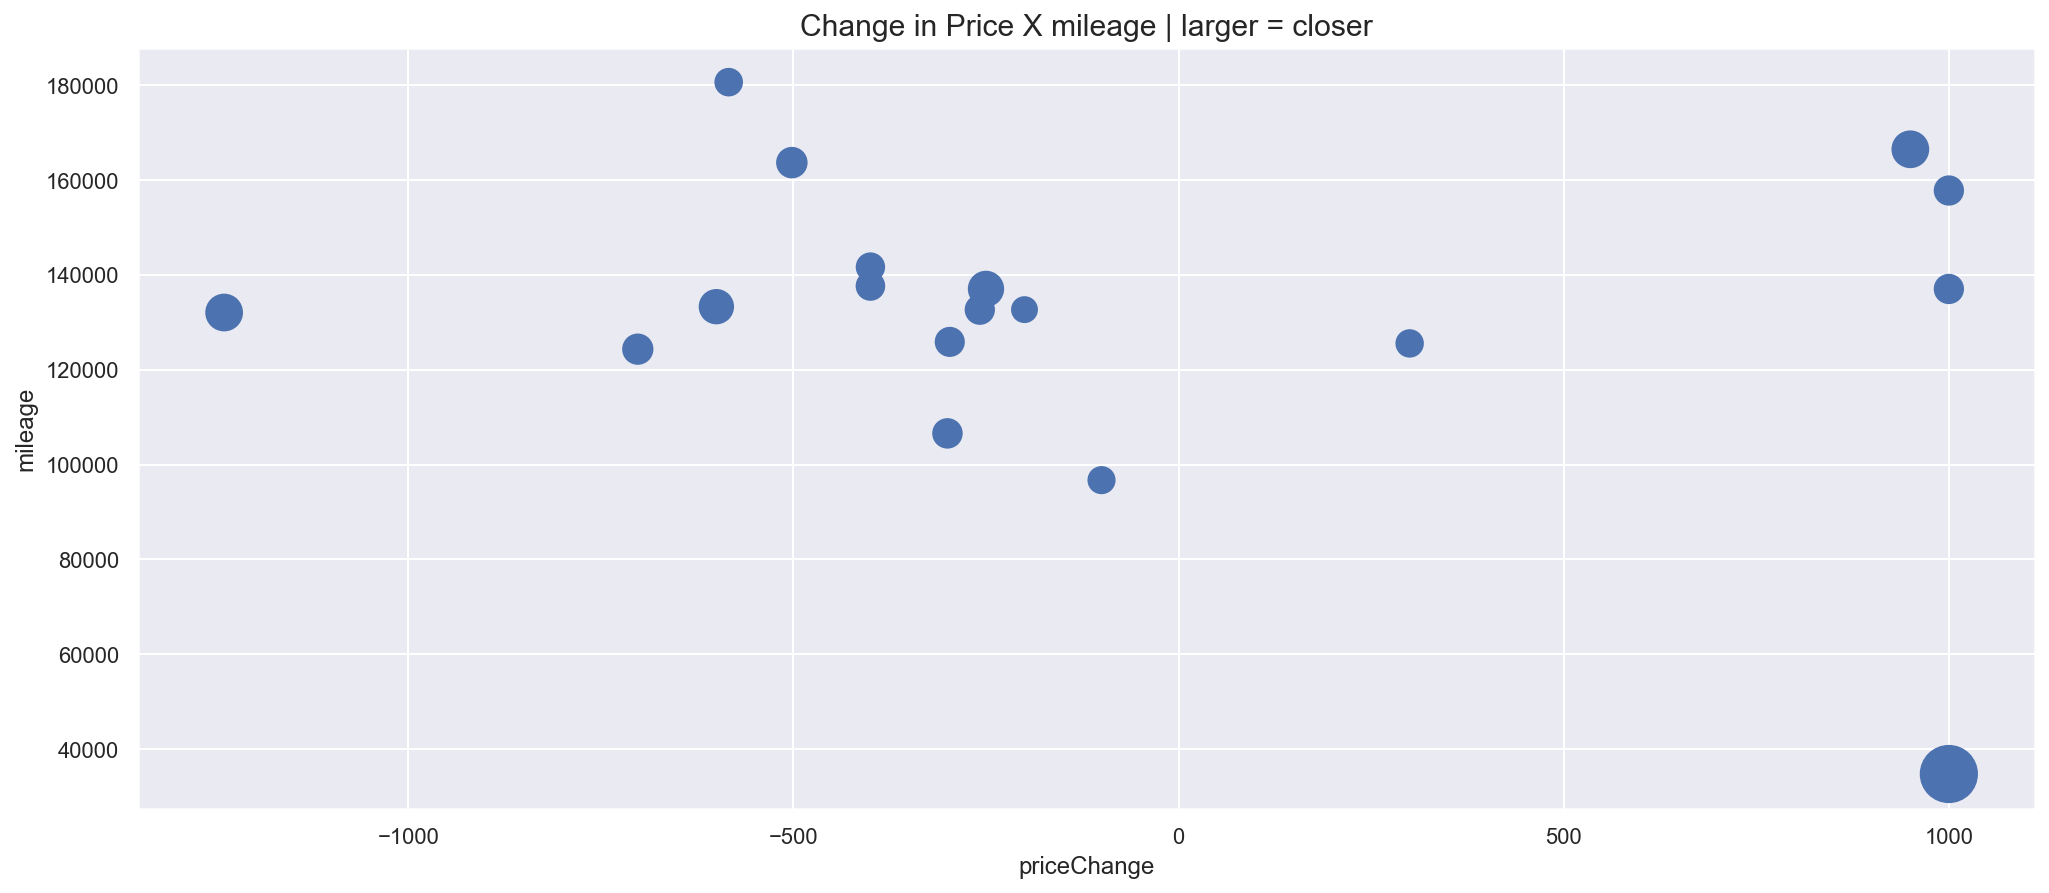

In [33]:
%%capture --no-display
filtered.plot(kind = 'scatter', x = 'priceChange', y = 'mileage', s = 15000 / filtered['distance'])
plt.title('Change in Price X mileage | larger = closer', size = 15)
plt.show()

In [34]:
carHistory[['title', 'mileage', 'distance', 'mostRecentPrice']].sort_values(by = 'mostRecentPrice').head(20)

,title,mileage,distance,mostRecentPrice
46,2014 Honda Civic LX,123617.0,19.0,7950.0
10,2012 Honda Civic LX,137603.0,79.0,8088.0
8,2012 Honda Civic LX,107000.0,82.0,8810.0
31,2013 Toyota Camry LE,200168.0,75.0,8995.0
2,2012 Honda Civic LX,34798.0,19.0,9950.0
97,2015 Toyota Prius c One,209883.0,75.0,9995.0
24,2013 Honda Civic LX,126024.0,98.0,10495.0
57,2014 Toyota Camry LE,163601.0,69.0,10895.0
27,2013 Honda Civic LX,134589.0,82.0,10981.0
11,2012 Honda Civic LX,138230.0,93.0,10995.0
